In [1]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Customer_Churn_Analysis\\data\\clean_churn_data.csv")

df.head()



Note: you may need to restart the kernel to use updated packages.


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   str    
 4   dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   str    
 7   multiplelines     7043 non-null   str    
 8   internetservice   7043 non-null   str    
 9   onlinesecurity    7043 non-null   str    
 10  onlinebackup      7043 non-null   str    
 11  deviceprotection  7043 non-null   str    
 12  techsupport       7043 non-null   str    
 13  streamingtv       7043 non-null   str    
 14  streamingmovies   7043 non-null   str    
 15  contract          7043 non-null   str    
 16  paperlessbilling  7043 non-null   str    
 17  paymen

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [7]:
df['churn'] = df['churn'].map({'Yes':1, 'No':0})

In [9]:
df['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

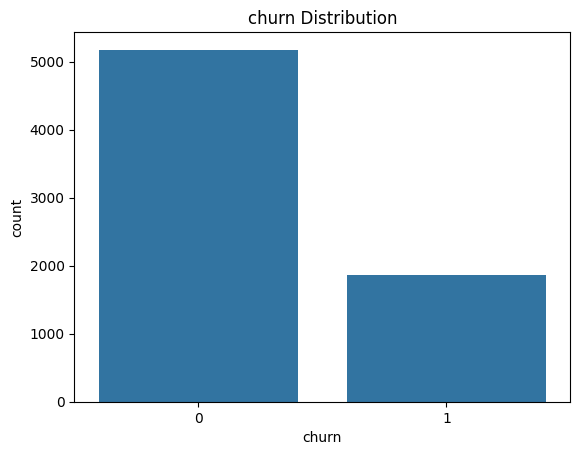

In [10]:
sns.countplot(x='churn', data=df)
plt.title("churn Distribution")
plt.show()

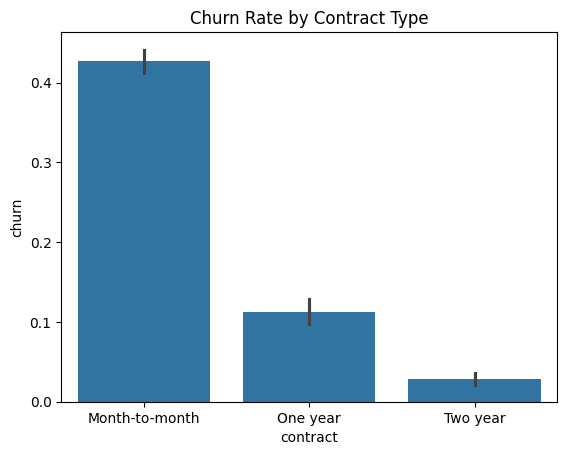

In [12]:
sns.barplot(x='contract', y='churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

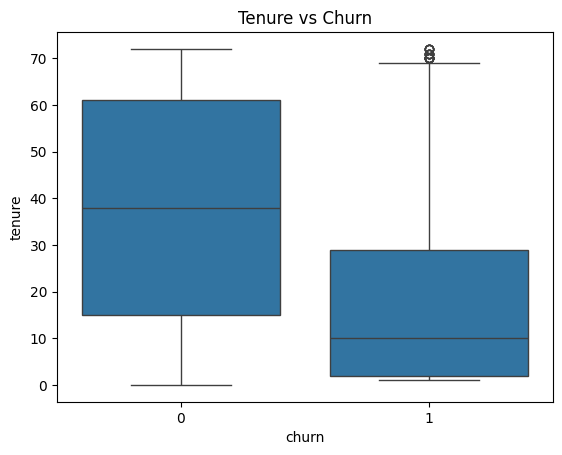

In [14]:
sns.boxplot(x='churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

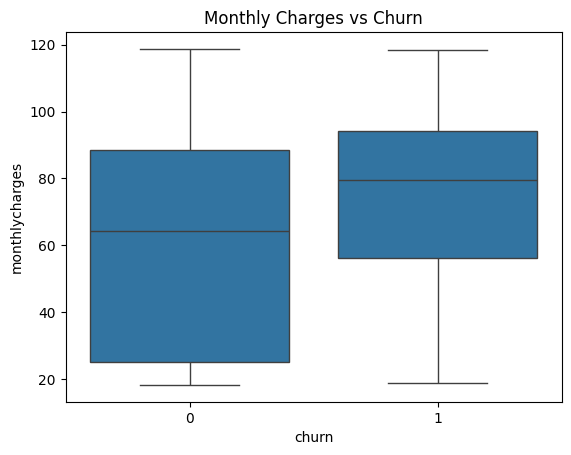

In [16]:
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

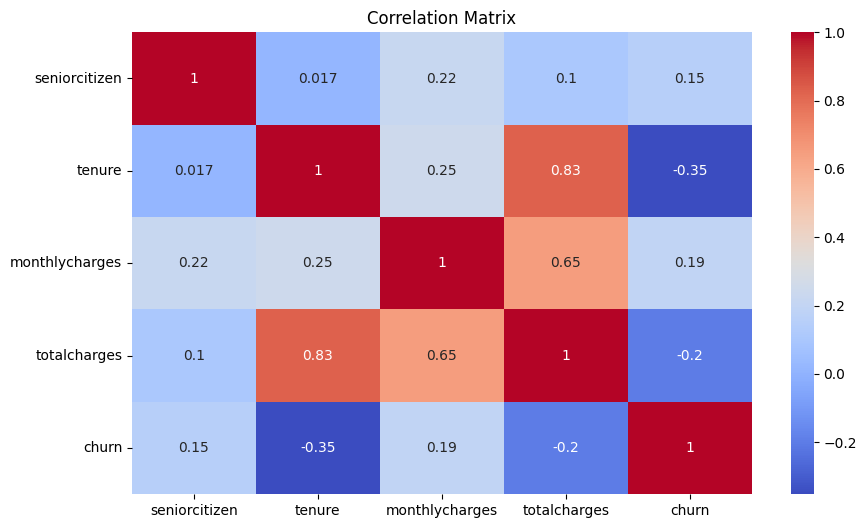

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [2]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,48,72],
    labels=['0-1yr','1-2yr','2-4yr','4-6yr']
)

In [3]:
df['tenure_group'].value_counts()

tenure_group
4-6yr    2239
0-1yr    2175
2-4yr    1594
1-2yr    1024
Name: count, dtype: int64

In [6]:
df['churn'].dtype

<StringDtype(storage='python', na_value=nan)>

In [7]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [8]:
df['churn'].dtype

dtype('int64')

In [9]:
df.groupby('tenure_group')['churn'].mean()

tenure_group
0-1yr    0.476782
1-2yr    0.287109
2-4yr    0.203890
4-6yr    0.095132
Name: churn, dtype: float64

In [11]:
df['HasTechSupport'] = df['techsupport'].apply(lambda x: 1 if x == 'Yes' else 0)

In [12]:
df.groupby('HasTechSupport')['churn'].mean()

HasTechSupport
0    0.311862
1    0.151663
Name: churn, dtype: float64

In [14]:
df['avg_monthly_spend'] = df['totalcharges'] / (df['tenure'] + 1)

In [16]:
df[['monthlycharges','avg_monthly_spend']].head()

,monthlycharges,avg_monthly_spend
0,29.85,14.925000
1,56.95,53.985714
2,53.85,36.050000
3,42.30,40.016304
4,70.70,50.550000


In [17]:
df[['avg_monthly_spend','churn']].corr()

,avg_monthly_spend,churn
avg_monthly_spend,1.000000,0.070992
churn,0.070992,1.000000


In [18]:
df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges         11
churn                 0
tenure_group         11
HasTechSupport        0
avg_monthly_spend    11
dtype: int64

In [19]:
df['totalcharges'] = df['totalcharges'].fillna(0)

In [21]:
df = df.drop('customerid', axis=1)

In [22]:
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             7043 non-null   str     
 1   seniorcitizen      7043 non-null   int64   
 2   partner            7043 non-null   str     
 3   dependents         7043 non-null   str     
 4   tenure             7043 non-null   int64   
 5   phoneservice       7043 non-null   str     
 6   multiplelines      7043 non-null   str     
 7   internetservice    7043 non-null   str     
 8   onlinesecurity     7043 non-null   str     
 9   onlinebackup       7043 non-null   str     
 10  deviceprotection   7043 non-null   str     
 11  techsupport        7043 non-null   str     
 12  streamingtv        7043 non-null   str     
 13  streamingmovies    7043 non-null   str     
 14  contract           7043 non-null   str     
 15  paperlessbilling   7043 non-null   str     
 16  paymentmethod    

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_group,HasTechSupport,avg_monthly_spend
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,0,14.925000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,0,2-4yr,0,53.985714
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1yr,0,36.050000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4yr,1,40.016304
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1yr,0,50.550000


In [23]:
df.to_csv("../data/churn_day3_ready.csv", index=False)